In [6]:
data_full="/mnt/lab_data2/anusri/finemo_gpu/output_profile/572M/hits_unique.tsv"
data_250M="/mnt/lab_data2/anusri/finemo_gpu/output_profile/250M/hits_unique.tsv"
data_100M="/mnt/lab_data2/anusri/finemo_gpu/output_profile/100M/hits_unique.tsv"
data_50M="/mnt/lab_data2/anusri/finemo_gpu/output_profile/50M/hits_unique.tsv"
data_25M="/mnt/lab_data2/anusri/finemo_gpu/output_profile/25M/hits_unique.tsv"
data_5M="/mnt/lab_data2/anusri/finemo_gpu/output_profile/5M/hits_unique.tsv"


In [7]:
import pandas as pd
import os
import numpy as np
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

import matplotlib.pyplot as plt


#MOTIF_HIT_FORMAT=["chr", "start", "end", "start_untrimmed", "end_untrimmed", "motif_name", "hit_coefficient", "hit_coefficient_global", "hit_correlation", "hit_importance", "strand", "peak_name", "peak_id"]
def read_data(data_file):
    annotations = {}
    data = pd.read_csv(data_file, sep="\t", header=0)
    data["motif_name"] = data["motif_name"].replace(["pos_patterns.pattern_10"], ["pos_patterns.pattern_5"])
    data["motif_name"] = data["motif_name"].replace(["pos_patterns.pattern_15"], ["pos_patterns.pattern_5"])
    data["motif_name"] = data["motif_name"].replace(["pos_patterns.pattern_16"], ["pos_patterns.pattern_11"])

#     data["motif_name"] = data["motif_name"].replace(["0_8_REL_MA0101.1"], ["0_9_NFKB1_HUMAN.H11MO.1.B"])
#     data["motif_name"] = data["motif_name"].replace(["0_5_RELB_HUMAN.H11MO.0.C"], ["0_9_NFKB1_HUMAN.H11MO.1.B"])
#     data["motif_name"] = data["motif_name"].replace(["0_14_RUNX1_HUMAN.H11MO.0.A"], ["0_4_RUNX3_HUMAN.H11MO.0.A"])
#     data["motif_name"] = data["motif_name"].replace(["0_21_IRF9_IRF_1"], ["0_0_IRF1_MOUSE.H11MO.0.A"])
#     data["motif_name"] = data["motif_name"].replace(["0_22_SPIB_ETS_1"], ["0_2_SPIB_MOUSE.H11MO.0.A"])
#     data["motif_name"] = data["motif_name"].replace(["0_29_PAX5_MOUSE.H11MO.0.A"], ["0_16_PAX2_PAX_1"])
    return data
    #for idx,row in data.iterrows():
    #    val = row["chr"]+":"+str(row["start"])+":"+str(row["end"])
    #    if row["motif_name"] not in annotations:
    #        annotations[row["motif_name"]] = []
        
    #    if val not in annotations[row["motif_name"]]:
    #        annotations[row["motif_name"]].append(val)
    #return annotations
        



In [9]:
full_hits = read_data(data_full)
hits_250M = read_data(data_250M)
hits_100M = read_data(data_100M)
hits_50M = read_data(data_50M)
hits_25M = read_data(data_25M)
hits_5M = read_data(data_5M)


In [10]:
full_hits

,chr,start,end,start_untrimmed,end_untrimmed,motif_name,hit_coefficient,hit_coefficient_global,hit_correlation,hit_importance,strand,peak_name,peak_id
0,chr10,12670,12674,12659,12689,neg_patterns.pattern_0,4.772730,1.091514e-07,0.863721,0.001525,+,Peak_223866,2967
1,chr10,13197,13205,13185,13215,pos_patterns.pattern_4,0.031983,7.314420e-10,0.752411,0.000994,-,Peak_223866,2967
2,chr10,13219,13223,13208,13238,neg_patterns.pattern_0,1.635859,3.741174e-08,0.902223,0.000837,+,Peak_223866,2967
3,chr10,13244,13248,13233,13263,neg_patterns.pattern_0,0.317550,7.262293e-09,0.747876,0.000887,+,Peak_223866,2967
4,chr10,13260,13264,13249,13279,neg_patterns.pattern_0,0.606054,1.386034e-08,0.877196,0.000499,+,Peak_223866,2967
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2238980,chr6,170612581,170612589,170612567,170612597,pos_patterns.pattern_28,0.025110,1.219968e-08,0.773764,0.003802,-,Peak_74854,265867
2238981,chr6,170612597,170612607,170612589,170612619,pos_patterns.pattern_2,77.766840,3.778298e-05,0.901431,0.033733,+,Peak_74854,265867
2238982,chr6,170612612,170612616,170612597,170612627,neg_patterns.pattern_0,2.156576,1.047771e-06,0.941434,0.003650,-,Peak_74854,265867
2238983,chr6,170612617,170612627,170612612,170612642,pos_patterns.pattern_29,0.695407,3.378632e-07,0.774412,0.006881,+,Peak_74854,265867


In [11]:
motif_names = full_hits["motif_name"].unique()

In [12]:
all_datasets = [hits_250M, hits_100M, hits_50M, hits_25M, hits_5M] 
recall_per_motif = {}
total_per_motif = {}

totals = [0,0,0,0,0,0]
for motif in motif_names:
    print(motif)
    if motif.split("_")[0] == "neg":
        continue
        
#     if int(motif.split("_")[2]) > 20:
#         continue
        
    if motif not in recall_per_motif:
        recall_per_motif[motif] = []
  
    if motif not in total_per_motif:
        total_per_motif[motif] = []
        
  
    new_data = full_hits[full_hits["motif_name"]==motif].copy()
    new_data["index"] = new_data["chr"] + ":" + new_data["start"].astype(str) + ":" + new_data["end"].astype(str)
    all_hits = np.unique(new_data["index"])
    totals[0] += all_hits.shape[0]
    #recall_per_motif[motif].append(all_hits.shape[0])

    jdx=1
    for dataset in all_datasets:
        new_data_sub= dataset[dataset["motif_name"]==motif].copy()
        new_data_sub["index"] = new_data_sub["chr"] + ":" + new_data_sub["start"].astype(str) + ":" + new_data_sub["end"].astype(str)
        all_hits_sub = np.unique(new_data_sub["index"])
        totals[jdx] += all_hits_sub.shape[0]
        retrieved = np.intersect1d(all_hits_sub,all_hits).shape[0]
        recall = retrieved/all_hits.shape[0]
        
        #recall = (retrieved-all_hits.shape[0])/all_hits.shape[0]
        #recall=retrieved
        
        #print(retrieved)
        #print(recall)
        recall_per_motif[motif].append(recall)
        total_per_motif[motif].append(all_hits.shape[0])
        jdx = jdx+1
        
        
    
    
    
        

neg_patterns.pattern_0
pos_patterns.pattern_4
pos_patterns.pattern_3
pos_patterns.pattern_11
pos_patterns.pattern_28
pos_patterns.pattern_2
pos_patterns.pattern_7
pos_patterns.pattern_1
pos_patterns.pattern_14
neg_patterns.pattern_1
pos_patterns.pattern_9
pos_patterns.pattern_12
pos_patterns.pattern_13
pos_patterns.pattern_8
pos_patterns.pattern_6
pos_patterns.pattern_21
pos_patterns.pattern_0
pos_patterns.pattern_5
pos_patterns.pattern_52
pos_patterns.pattern_26
pos_patterns.pattern_19
pos_patterns.pattern_25
pos_patterns.pattern_23
pos_patterns.pattern_48
pos_patterns.pattern_29
pos_patterns.pattern_31
pos_patterns.pattern_20
pos_patterns.pattern_18
pos_patterns.pattern_22
pos_patterns.pattern_43
pos_patterns.pattern_24
pos_patterns.pattern_39
pos_patterns.pattern_30
pos_patterns.pattern_41
pos_patterns.pattern_38
pos_patterns.pattern_46
pos_patterns.pattern_32
pos_patterns.pattern_27
pos_patterns.pattern_17
pos_patterns.pattern_33
pos_patterns.pattern_37
pos_patterns.pattern_47
pos_

In [13]:
new_order = sorted(recall_per_motif)
new_order1 = new_order[0:1] + new_order[2:] + new_order[1:2]

In [14]:
new_order1

['pos_patterns.pattern_0',
 'pos_patterns.pattern_11',
 'pos_patterns.pattern_12',
 'pos_patterns.pattern_13',
 'pos_patterns.pattern_14',
 'pos_patterns.pattern_17',
 'pos_patterns.pattern_18',
 'pos_patterns.pattern_19',
 'pos_patterns.pattern_2',
 'pos_patterns.pattern_20',
 'pos_patterns.pattern_21',
 'pos_patterns.pattern_22',
 'pos_patterns.pattern_23',
 'pos_patterns.pattern_24',
 'pos_patterns.pattern_25',
 'pos_patterns.pattern_26',
 'pos_patterns.pattern_27',
 'pos_patterns.pattern_28',
 'pos_patterns.pattern_29',
 'pos_patterns.pattern_3',
 'pos_patterns.pattern_30',
 'pos_patterns.pattern_31',
 'pos_patterns.pattern_32',
 'pos_patterns.pattern_33',
 'pos_patterns.pattern_34',
 'pos_patterns.pattern_35',
 'pos_patterns.pattern_36',
 'pos_patterns.pattern_37',
 'pos_patterns.pattern_38',
 'pos_patterns.pattern_39',
 'pos_patterns.pattern_4',
 'pos_patterns.pattern_40',
 'pos_patterns.pattern_41',
 'pos_patterns.pattern_42',
 'pos_patterns.pattern_43',
 'pos_patterns.pattern_4

([<matplotlib.axis.XTick at 0x7f159be03a90>,
 [Text(1, 0, '250M'),
  Text(2, 0, '100M'),
  Text(3, 0, '50M'),
  Text(4, 0, '25M'),
  Text(5, 0, '5M')])

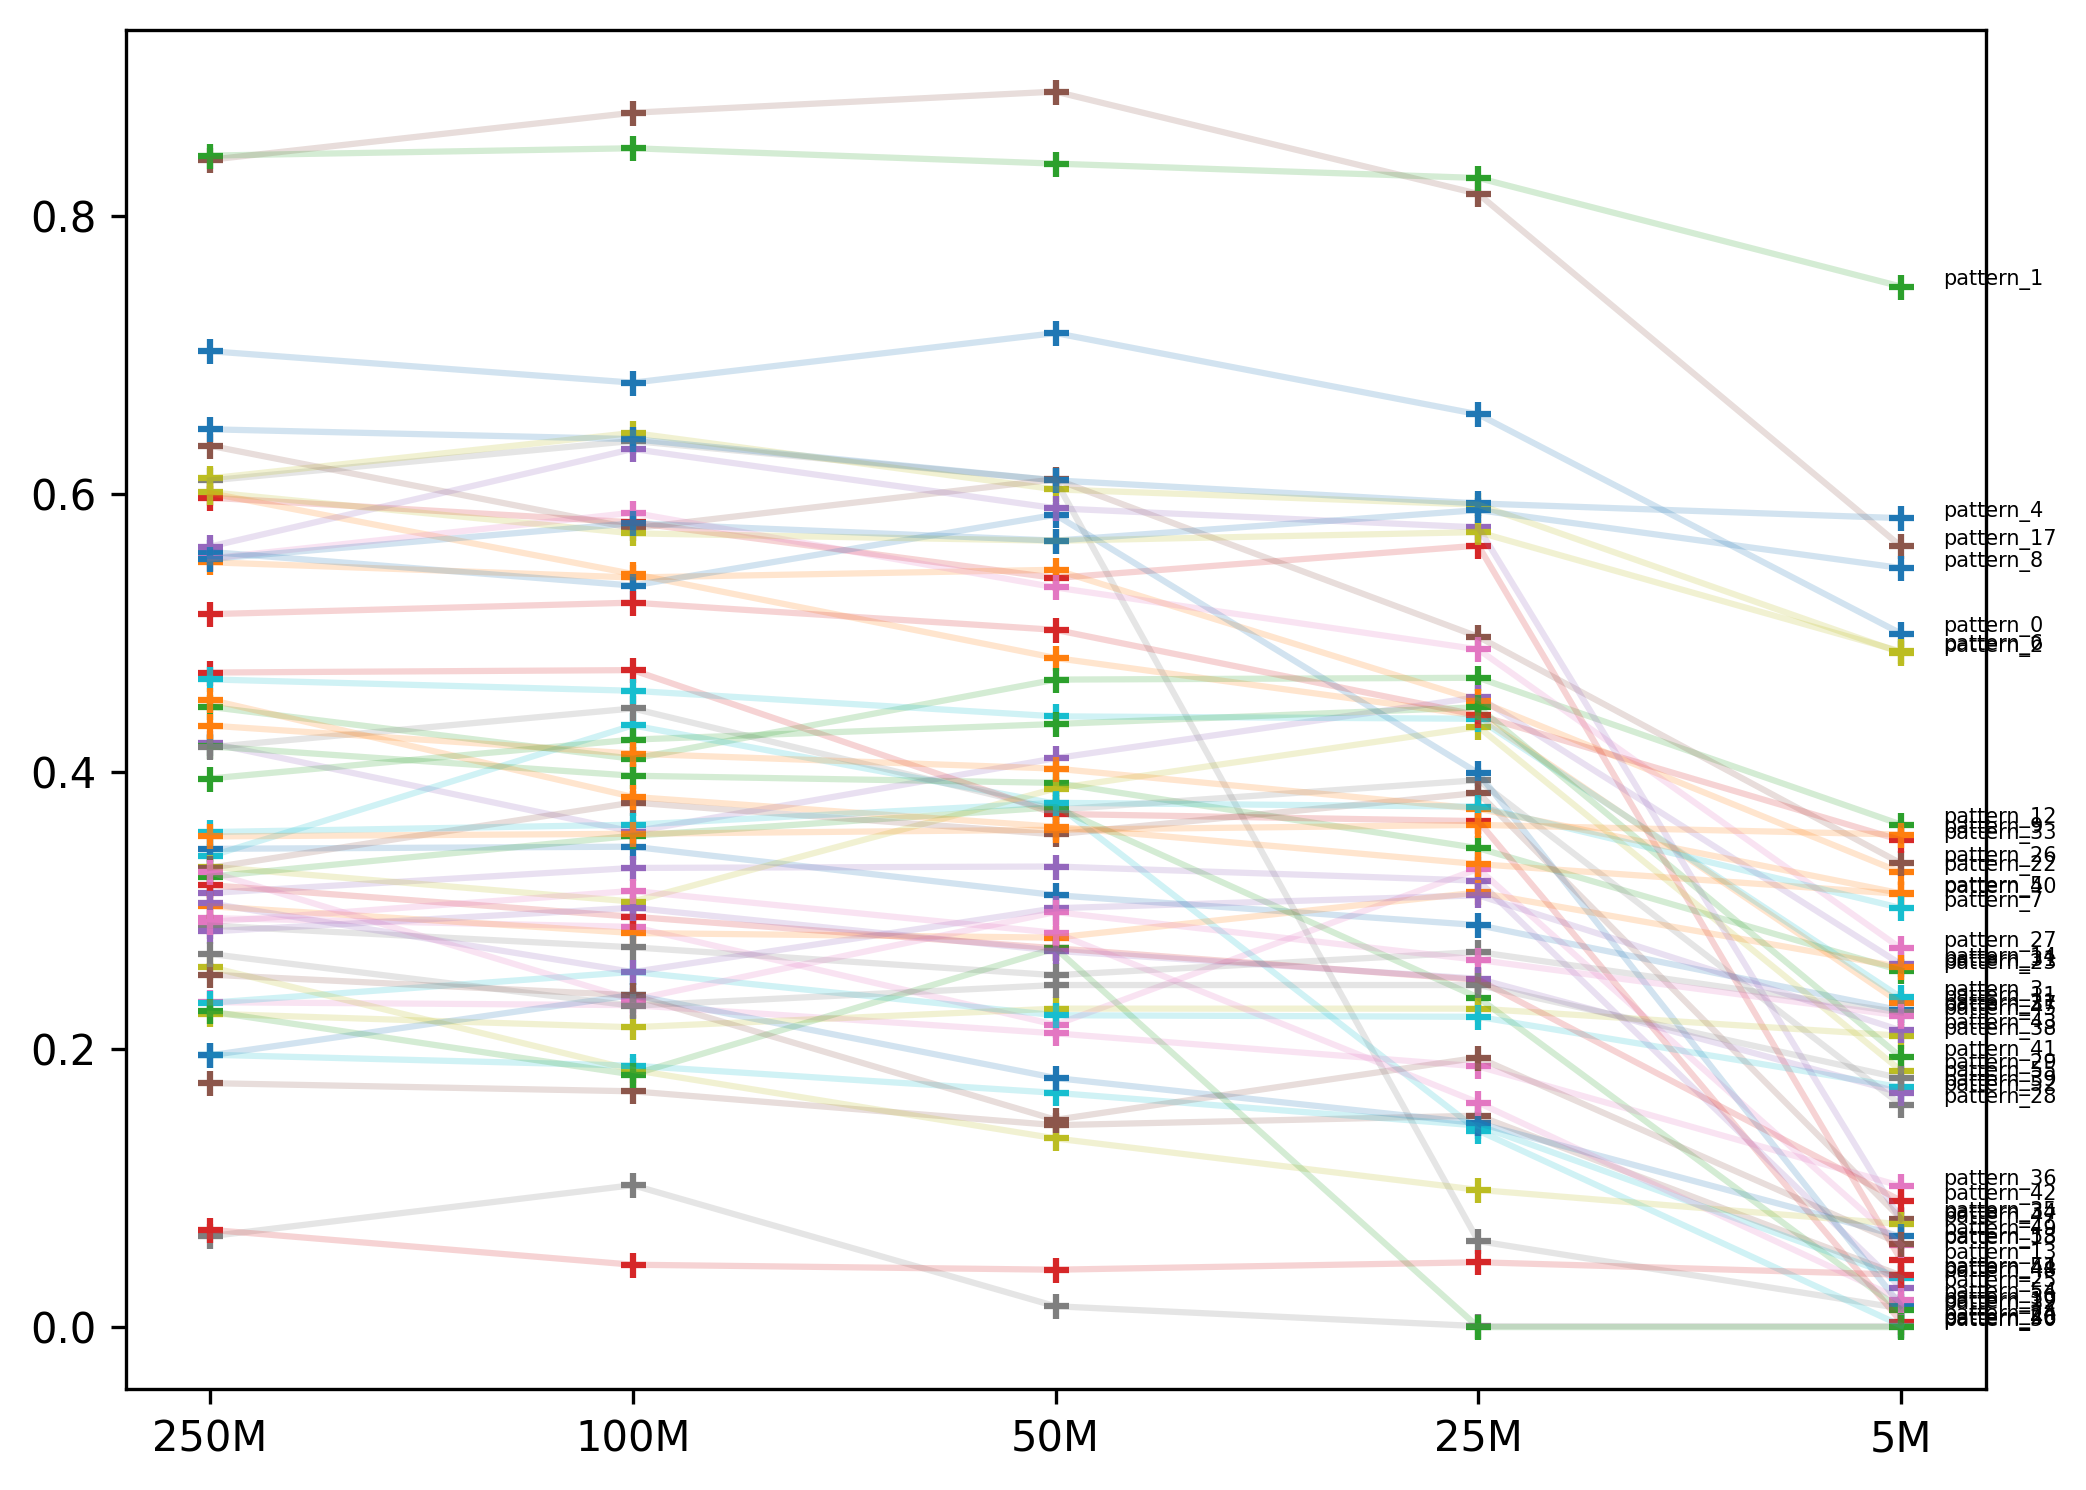

In [15]:

plt.figure(figsize=(8, 6), dpi=300)

for motif in new_order1:
    plt.scatter([1 ,2, 3, 4, 5], recall_per_motif[motif], label=motif, marker="+")
    plt.plot([1 ,2, 3, 4, 5], recall_per_motif[motif],alpha=0.2)
    #print(yaxis_lims)
    plt.text(5.1, recall_per_motif[motif][-1]+0.001, motif.split(".")[-1], fontsize=5)
    
plt.xticks([1 ,2, 3, 4, 5], labels=["250M", "100M" , "50M", "25M", "5M"])

#plt.savefig("subfigs/hitcalling_compare/"+"hitcalling_report_recall.pdf", dpi=300, transparent=True)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


In [16]:
recall_per_motif[motif]

[0.8434819693882386,
 0.8487655783537885,
 0.8376771075202578,
 0.8273468227266265,
 0.7491825806757333]

In [17]:
motif

'pos_patterns.pattern_1'

In [18]:
total_per_motif

{'pos_patterns.pattern_4': [74603, 74603, 74603, 74603, 74603],
 'pos_patterns.pattern_3': [246500, 246500, 246500, 246500, 246500],
 'pos_patterns.pattern_11': [27513, 27513, 27513, 27513, 27513],
 'pos_patterns.pattern_28': [13855, 13855, 13855, 13855, 13855],
 'pos_patterns.pattern_2': [331323, 331323, 331323, 331323, 331323],
 'pos_patterns.pattern_7': [74292, 74292, 74292, 74292, 74292],
 'pos_patterns.pattern_1': [42206, 42206, 42206, 42206, 42206],
 'pos_patterns.pattern_14': [35211, 35211, 35211, 35211, 35211],
 'pos_patterns.pattern_9': [42219, 42219, 42219, 42219, 42219],
 'pos_patterns.pattern_12': [19739, 19739, 19739, 19739, 19739],
 'pos_patterns.pattern_13': [21212, 21212, 21212, 21212, 21212],
 'pos_patterns.pattern_8': [88985, 88985, 88985, 88985, 88985],
 'pos_patterns.pattern_6': [25485, 25485, 25485, 25485, 25485],
 'pos_patterns.pattern_21': [8393, 8393, 8393, 8393, 8393],
 'pos_patterns.pattern_0': [103742, 103742, 103742, 103742, 103742],
 'pos_patterns.pattern_5

In [19]:
recall_per_motif

{'pos_patterns.pattern_4': [0.6464083213811777,
  0.639344262295082,
  0.6096135544147018,
  0.5930458560647696,
  0.5824296610055896],
 'pos_patterns.pattern_3': [0.4663123732251521,
  0.45813793103448275,
  0.4397281947261663,
  0.4379878296146045,
  0.23730628803245435],
 'pos_patterns.pattern_11': [0.6004070802893178,
  0.5422890996983244,
  0.4817359066623051,
  0.4401919092792498,
  0.2331261585432341],
 'pos_patterns.pattern_28': [0.4174666185492602,
  0.44539877300613495,
  0.37250090220137133,
  0.39379285456513896,
  0.16008661133164923],
 'pos_patterns.pattern_2': [0.6110592986300377,
  0.6437947259924606,
  0.6031244435188623,
  0.5921623310183718,
  0.4855231903610676],
 'pos_patterns.pattern_7': [0.3564044580843159,
  0.3616809346901416,
  0.37745652290959997,
  0.3747106014106499,
  0.3017013944973887],
 'pos_patterns.pattern_1': [0.8434819693882386,
  0.8487655783537885,
  0.8376771075202578,
  0.8273468227266265,
  0.7491825806757333],
 'pos_patterns.pattern_14': [0.42

In [24]:
lists1 = []
for motif in new_order1:
    temp = [motif.split(".")[-1],250,recall_per_motif[motif][0],total_per_motif[motif][0]]
    lists1.append(temp)
    temp = [motif.split(".")[-1],100,recall_per_motif[motif][1],total_per_motif[motif][1]]
    lists1.append(temp)
    temp = [motif.split(".")[-1],50,recall_per_motif[motif][2],total_per_motif[motif][2]]
    lists1.append(temp)
    temp = [motif.split(".")[-1],25,recall_per_motif[motif][3],total_per_motif[motif][3]]
    lists1.append(temp)
    temp = [motif.split(".")[-1],5,recall_per_motif[motif][4],total_per_motif[motif][4]]
    lists1.append(temp)

In [25]:
df=pd.DataFrame(lists1,columns = ['Motif', 'Timepoint', "Recall", "Total"])
# name_mapping = {'pattern_20': "PAX",
#              'pattern_19': "HNF1A",
#              'pattern_13': "POU5F1",
#              'pattern_18': "COE1",
#              'pattern_11': "BATF",
#              'pattern_14': "FOSL1+JUND", 
#              'pattern_3': "RUNX",
#              'pattern_12': "NRF1",
#              'pattern_17': "ZNF76",
#              'pattern_5': "NFKB1",
#              'pattern_8': "KLF12",
#              'pattern_7': "ELK",
#              'pattern_6': "IRF4",
#              'pattern_2': "SPI1",
#              'pattern_9': "NFYB",
#              'pattern_0': "IRF1",
#              'pattern_1': "CTCF",
#              'pattern_4': "JDP",
#             }

df["Motif"] = df["Motif"].str.replace("pattern_", "")
#df['Motif'] = df['Motif'].map(name_mapping)


In [26]:
df = df[df["Motif"].astype(int)  <= 20]
df["Motif"]="pattern_"+df["Motif"].astype(str)

name_mapping = {'pattern_20': "PAX",
             'pattern_19': "HNF1A",
             'pattern_13': "POU5F1",
             'pattern_18': "COE1",
             'pattern_11': "BATF",
             'pattern_14': "FOSL1+JUND", 
             'pattern_3': "RUNX",
             'pattern_12': "NRF1",
             'pattern_17': "ZNF76",
             'pattern_5': "NFKB1",
             'pattern_8': "KLF12",
             'pattern_7': "ELK",
             'pattern_6': "IRF4",
             'pattern_2': "SPI1",
             'pattern_9': "NFYB",
             'pattern_0': "IRF1",
             'pattern_1': "CTCF",
             'pattern_4': "JDP",
            }

df['Motif'] = df['Motif'].map(name_mapping)


In [27]:
df

,Motif,Timepoint,Recall,Total
0,IRF1,250,0.702637,103742
1,IRF1,100,0.679985,103742
2,IRF1,50,0.715689,103742
3,IRF1,25,0.657178,103742
4,IRF1,5,0.499345,103742
...,...,...,...,...
260,CTCF,250,0.843482,42206
261,CTCF,100,0.848766,42206
262,CTCF,50,0.837677,42206
263,CTCF,25,0.827347,42206


In [29]:
df.to_csv("subfigs/hitcalling_compare/subsample_data_finemo_profile.csv",index=False,header=True)

In [102]:
total_hits = []
dfs = [full_hits, hits_250M, hits_100M, hits_50M, hits_25M, hits_5M] 
for df in dfs:
    total_hits.append(df.shape[0])

(0.0, 2041180.0)

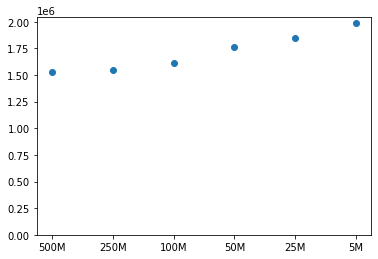

In [103]:
read_depth = ["500M", "250M", "100M", "50M", "25M", "5M"]
plt.scatter(read_depth,totals)
plt.ylim((0,max(totals)+0.5e5))

In [37]:
totals[-1]

1736815